### 📌This is Exercise problem 3

From given titanic dataset, create a model to predict if a passenger can survive titanic shipwreck  
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Import the dataset

data = pd.read_csv("dataset/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing values

'Cabin'

In [151]:
data.drop('Cabin',axis=1,inplace=True)

'Age'

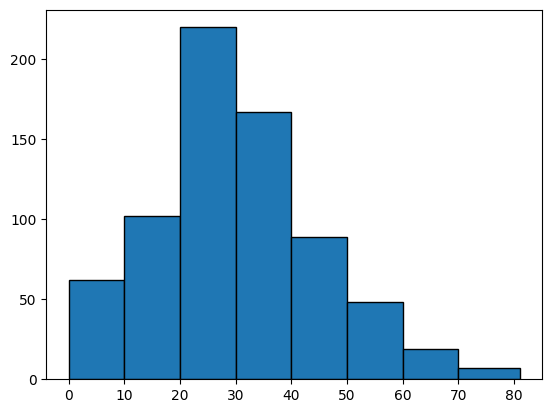

In [152]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Majority of ages are coming in range of 20-40  
So im giving missing instance any random value from this range

In [153]:
range_age = range(20,40)
data['Age'] = data['Age'].apply(lambda x: np.random.choice(range_age) if pd.isna(x) else x)


## Note: initially i use "x==np.nan" but it didnot work, why? because LHS = NaN, RHS = NaN
# But Nan is never equal to Nan (even itself)

In [154]:
data['Age'].isnull().sum()

np.int64(0)

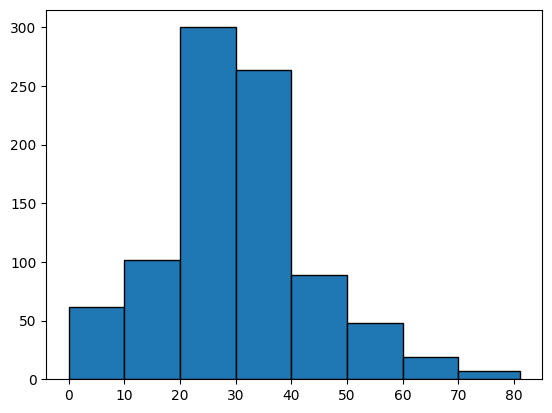

In [155]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Graph is still almost the same...  
Maybe we did the right thing

'Embarked'

In [156]:
data['Embarked'].value_counts()

# We have only two missing values, lets just use mode imputation

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [157]:
mode = data['Embarked'].mode()
mode[0]

'S'

In [158]:
mode = data['Embarked'].mode()
print(mode[0])
data.fillna({'Embarked':mode[0]},inplace=True)   # This syntax is according to warning 

S


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Dealed with all the missing values

### EDA

In [160]:
num_features = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

In [161]:
## Correlation matrix
corr_mat = data[num_features].corr()
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.029447,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.076753,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.320503,0.083081,0.018443,-0.549500
Age,0.029447,-0.076753,-0.320503,1.000000,-0.225115,-0.178400,0.087012
SibSp,-0.057527,-0.035322,0.083081,-0.225115,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.178400,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.087012,0.159651,0.216225,1.000000


<Axes: >

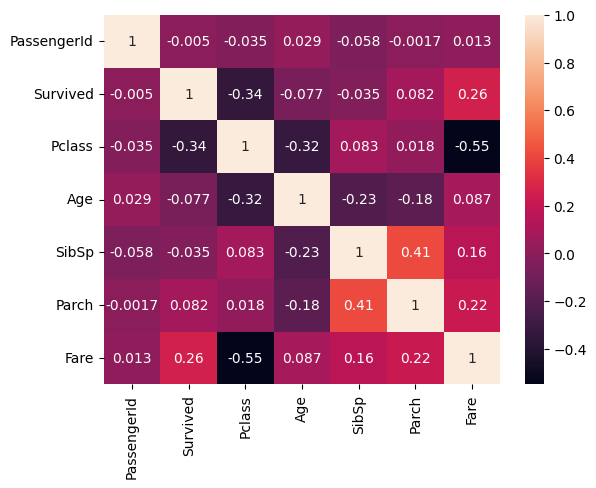

In [162]:
sns.heatmap(data[num_features].corr(),annot=True)


- Its clear that 'PassengerId' doesnt matter



In [163]:
corr_mat.Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.076753
Pclass        -0.338481
Name: Survived, dtype: float64

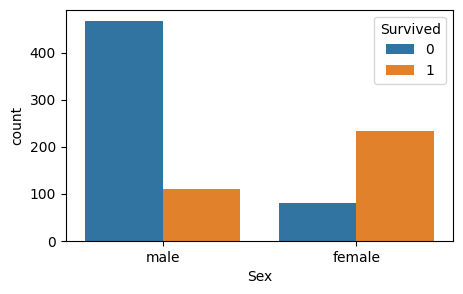

In [164]:
# Sex vs Survive
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

Dude so many females survived?

In [165]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [166]:
## Countplot of every categorical feature
cat_cols = ['Survived','Pclass','SibSp','Parch','Sex']

### Feature engineering

In [167]:
# We dont really need 'Name and PassengerId' to provide to machines
data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Encoding

In [169]:
## Sex
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [170]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

data_encoded = encoder.fit_transform(data[['Sex','Embarked']]).toarray()

In [171]:
data_encoded_df = pd.DataFrame(data_encoded,columns=encoder.get_feature_names_out())
data_encoded_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [172]:
data_encoded = pd.concat([data,data_encoded_df],axis=1)
data_encoded.drop(['Sex','Embarked'],axis=1,inplace=True)

In [173]:
data_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,38.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


#### Upsampling By SMOTE

In [174]:
X = data_encoded.drop('Survived',axis=1)
y = data_encoded['Survived'].copy()

In [175]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [176]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled,y_resampled = smote.fit_resample(X,y)

In [177]:
X_resampled

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.250000,0.000000,1.000000,0.0,0.0,1.0
1,1,38.000000,1,0,71.283300,1.000000,0.000000,1.0,0.0,0.0
2,3,26.000000,0,0,7.925000,1.000000,0.000000,0.0,0.0,1.0
3,1,35.000000,1,0,53.100000,1.000000,0.000000,0.0,0.0,1.0
4,3,35.000000,0,0,8.050000,0.000000,1.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1093,1,52.336938,0,1,24.967957,0.445646,0.554354,0.0,0.0,1.0
1094,1,25.835162,0,0,73.844596,0.388279,0.611721,1.0,0.0,0.0
1095,2,32.790200,1,0,14.654140,1.000000,0.000000,0.0,0.0,1.0
1096,2,28.495462,0,0,13.000000,1.000000,0.000000,0.0,0.0,1.0


In [178]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [179]:
y_resampled.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

## Model Selection

In [180]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_resampled,y_resampled)

SGDClassifier()

In [181]:
from sklearn.model_selection import cross_val_predict
sgd_pred = cross_val_predict(sgd_clf,X,y,cv=3)
# Performance check
from sklearn.metrics import accuracy_score,precision_score,recall_score

sgd_acc,sgd_pre,sgd_re = accuracy_score(y,sgd_pred),precision_score(y,sgd_pred),recall_score(y,sgd_pred)
print('accuracy',sgd_acc)
print('precision',sgd_pre)
print('recall',sgd_re)

accuracy 0.6868686868686869
precision 0.7647058823529411
recall 0.26608187134502925


In [182]:
def get_scores(y_true,y_pred):
    return {"Accuracy":accuracy_score(y_true,y_pred),
            "Precision":precision_score(y_true,y_pred),
            "Recall":recall_score(y_true,y_pred)
            }

In [183]:
get_scores(y,sgd_pred)

{'Accuracy': 0.6868686868686869,
 'Precision': 0.7647058823529411,
 'Recall': 0.26608187134502925}

Failed Miserably!

In [184]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [185]:
kn_pred = cross_val_predict(kn_clf,X_resampled,y_resampled,cv=3)
# Performance check
from sklearn.metrics import accuracy_score,precision_score,recall_score

kn_acc,kn_pre,kn_re = accuracy_score(y_resampled,kn_pred),precision_score(y_resampled,kn_pred),recall_score(y_resampled,kn_pred)
print('accuracy',kn_acc)
print('precision',kn_pre)
print('recall',kn_re)

accuracy 0.7486338797814208
precision 0.7365684575389948
recall 0.7741347905282332


In [186]:
from sklearn.metrics import precision_recall_curve
y_proba = kn_clf.predict_proba(X_resampled)
kn_precision,kn_recall,kn_threshold = precision_recall_curve(y_resampled,y_proba[:,1])

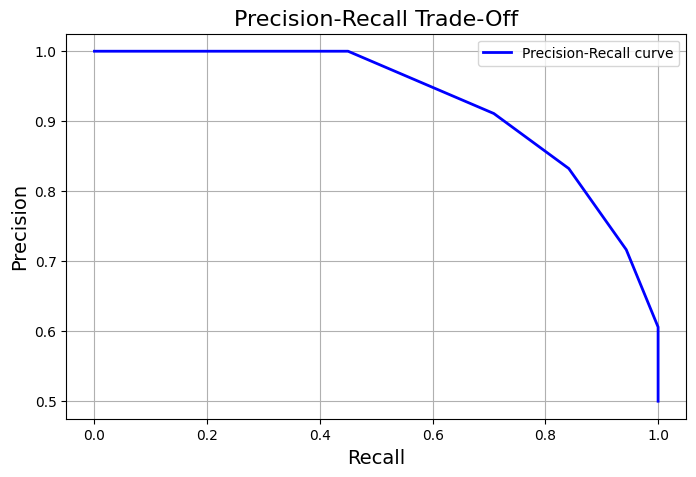

In [187]:
plt.figure(figsize=(8, 5))
plt.plot(kn_recall,kn_precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Trade-Off", fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()

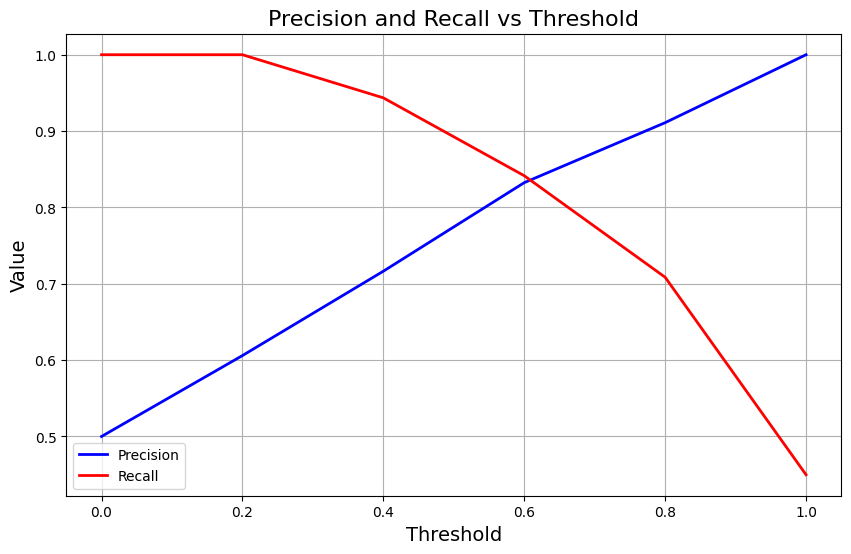

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(kn_threshold, kn_precision[:-1], label='Precision', color='blue', lw=2)
plt.plot(kn_threshold, kn_recall[:-1], label='Recall', color='red', lw=2)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Precision and Recall vs Threshold', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()

NOOOOOO way, still cant get a good threshold where precision and recall both are high

In [189]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=42)
rand_clf.fit(X_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [190]:
get_scores(y_resampled,rand_clf.predict(X_resampled))

{'Accuracy': 0.9845173041894353,
 'Precision': 0.9907749077490775,
 'Recall': 0.9781420765027322}

#### ___BOOM___!!!

In [191]:
rand_scores = cross_val_predict(rand_clf,X_resampled,y_resampled,cv=3,method='predict_proba')
rand_scores = rand_scores[:,1]

In [192]:
sgd_score = cross_val_predict(sgd_clf,X_resampled,y_resampled,cv=3,method='decision_function')

In [193]:
kn_score = kn_clf.predict_proba(X_resampled)[:,1]

In [194]:
from sklearn.metrics import f1_score
rand_f1_score = f1_score(y_resampled,rand_clf.predict(X_resampled))
rand_f1_score

0.9844179651695693

In [195]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_multiple_roc_curves(results, figsize=(8,6)):
    """
    Plots multiple ROC curves on a single canvas.
    
    Parameters:
      - results: list of tuples in the form (label, y_true, y_scores)
          * label: string identifier for the model
          * y_true: array-like, true binary labels for this model
          * y_scores: array-like, predicted scores/probabilities for the positive class
      - figsize: tuple, figure size for the plot (default is (8, 6))
    
    The function computes and plots the ROC curve for each provided model along with the AUC.
    A reference diagonal line (random guessing) is also shown.
    """
    plt.figure(figsize=figsize)
    
    # Loop over each set of results and plot their ROC curve
    for label, y_true, y_scores in results:
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        auc_score = roc_auc_score(y_true, y_scores)
        plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {auc_score:.2f})")
    
    # Plot the reference line for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
    
    # Set the axes labels and title
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("ROC Curve Comparison", fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


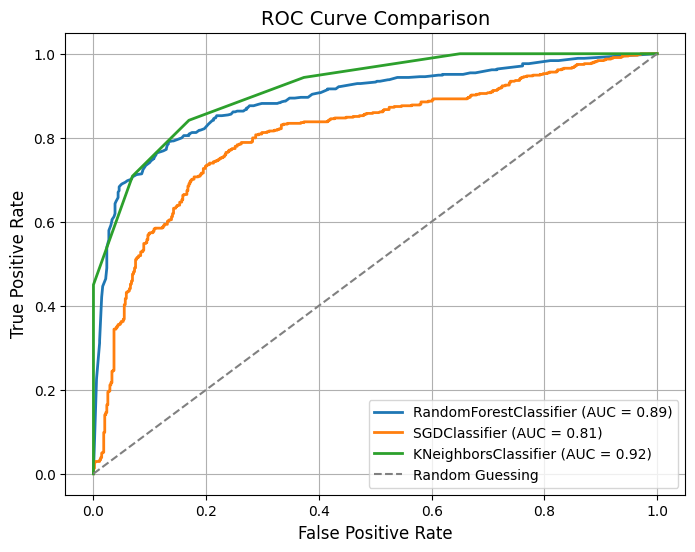

In [196]:
plot_multiple_roc_curves([('RandomForestClassifier',y_resampled,rand_scores),('SGDClassifier',y_resampled,sgd_score),
                         ('KNeighborsClassifier',y_resampled,kn_score)])

NOW fking AUC of kn_classifier is higherrrrrrrrr

RandomForestClassifier Selected!